In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) Install Dependencies & Import Them

In [2]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 696 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
!pip install bs4

In [4]:
!pip install pandas

In [5]:
import re
import csv
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import urllib.request 
from bs4 import BeautifulSoup

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

### 2) Parse Texts from a Web Article

In [ ]:
# indicate address for chosen URL
url = "https://www.rigzone.com/news/what_could_omicron_cost_global_oil_market-03-dec-2021-167199-article"

In [ ]:
# open the URL for reading
html = urllib.request.urlopen(url)

In [ ]:
# parsing the html file
htmlParse = BeautifulSoup(html, 'html.parser')

In [ ]:
#this variable shows all the attributes from the site
htmlParse


<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://www.googletagmanager.com/" rel="preconnect"/>
<link href="https://stats.g.dpoubleclick.net" rel="preconnect"/>
<link href="https://doubleclickbygoogle.com" rel="preconnect"/>
<link href="https://cdn.taboola.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://tpc.googlesyndication.com" rel="preconnect"/>
<link href="https://pagead2.googlesyndication.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="max-image-preview:large" name="robots"/>
<title>
        What Could Omicron Cost Global Oil Market?  | Rigzone    </title>
<link as="style" href="/oil/Content/main.css" onload="this.rel='stylesheet'" rel="preload"/>
<link as="style" href="/oil/Areas/News/Views/News/jquery-ui.css" media="all" onload="this.rel='stylesheet'" rel="preload"/

In [ ]:
# getting only the text paragraphs (ie: excluding colors, position, images, etc)
for para in htmlParse.find_all("p"):
    print(para.get_text())


The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions.
That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by 4.2 million barrels per day, to 94.2 million barrels per day, in January 2022.
The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact will likely be less severe. Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario.
“The likelihood of increasing lockdowns in the co

In [ ]:
#store the text paragraphs into a variable
parsed_text_list = []

for para in htmlParse.find_all("p"):
    parsed_text_list.append(para.get_text())

In [ ]:
#display data
parsed_text_list

['',
 'The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions.',
 'That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by 4.2 million barrels per day, to 94.2 million barrels per day, in January 2022.',
 'The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact will likely be less severe. Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario.',
 '“The likelihood of increasing l

In [ ]:
#store the text paragraphs into a variable
#parsed_text_str = ""
parsed_text = ""

for para in htmlParse.find_all("p"):
    #parsed_text_str += str(para.get_text())
    parsed_text = " ".join((parsed_text, str(para.get_text())))

In [ ]:
parsed_text

'  The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions. That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by 4.2 million barrels per day, to 94.2 million barrels per day, in January 2022. The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact will likely be less severe. Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario. “The likelihood of increasing lockdowns in the 

### 3) Convert the Text into Sentences & save in CSV format

In [ ]:
for i in nlp(parsed_text).sents:
    print([i])

[  ]
[The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions.]
[That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by 4.2 million barrels per day, to 94.2 million barrels per day, in January 2022.]
[The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact will likely be less severe.]
[Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario.]
[“The likelihood of increasing lockdo

In [ ]:
sentences = [[i] for i in nlp(parsed_text).sents]

In [ ]:
sentences

[[  ],
 [The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions.],
 [That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by 4.2 million barrels per day, to 94.2 million barrels per day, in January 2022.],
 [The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact will likely be less severe.],
 [Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario.],
 [“The likelihood of increa

In [ ]:
import csv
myheaders = ['sentence']
myvalues = sentences
filename = 'article_text.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

Good reference for saving data to CSV: https://www.easytweaks.com/write-list-csv-python/

Data cleaning was done manually by downloading the CSV file and delete the empty columns

### 4) Re-Import Cleaned Data

In [7]:
csv_sentences = pd.read_csv("/content/drive/MyDrive/NLPstuffs/article_text_clean.csv")

In [ ]:
csv_sentences

,sentence
0,"The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million ..."
1,"That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by..."
2,"The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact wil..."
3,"Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario."
4,"“The likelihood of increasing lockdowns in the coming months has risen dramatically due to the new Omicron variant, and this will undoubtedly impact global oil demand,” Claudio Galimberti, Rystad’..."
5,"“Given the early stage of the variant outbreak and the unknowns related to contagiousness and vaccine efficacy, we can only hope this scenario turns out to be a false alarm."
6,"Still, if the risk is real, the oil market will need to recalibrate accordingly,” he added in the statement."
7,Omicron Product Impact
8,"In the first quarter of 2022, demand for gasoline could fall by up to 1.3 million barrels per day to 24.2 million barrels per day due to Omicron, according to Rystad."
9,That’s a five percent decrease from its base levels of 25.5 million barrels per day.


In [9]:
csv_sentences.shape

(32, 1)

In [10]:
csv_sentences['sentence'].sample(5)

11                                           Estimates show jet fuel demand could drop six percent in the first quarter of 2022 from the expected 5.5 million barrels per day to 5.2 million barrels per day.
24                                                     Global Covid-19 cases have risen for the past six consecutive weeks and deaths have risen in four out of the last six weeks, according to WHO figures.
29                                                                                                                          The B.1.1.529 variant was first reported to WHO from South Africa on November 24.
1     That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by...
17                                 Rystad admitted that the status quo could change and said regional reactions will be dictated by vaccination rates, cultural attitudes toward

### 5) Sentence Segmentation

In [12]:
doc = nlp("My name is Hami.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

My ... poss
name ... nsubj
is ... ROOT
Hami ... attr
. ... punct


In [13]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [14]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [16]:
get_entities("Hami is a friend of Haziq.")

['Hami', 'Haziq']

In [19]:
entity_pairs = []

for i in tqdm(csv_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 32/32 [00:01<00:00, 17.21it/s]


In [20]:
entity_pairs[10:20]

[['significantly travel Rystad', 'significantly  flights'],
 ['jet fuel demand', '5.2 million 5.2 day'],
 ['second  quarters', '6.2 million 6.2 day'],
 ['far  it', 'Omicron variant'],
 ['economic  Rystad', 'company statement'],
 ['Countries', 'future tolerance waves'],
 ['economic  Rystad', 'statement'],
 ['regional  reactions', 'cultural vaccination risks'],
 ['broadly hospital Rystad', 'intensive hospital beds'],
 ['pandemic', 'myriad  reasons']]

In [21]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [23]:
get_relation("Hami created this file")

'created'

In [25]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

100%|██████████| 32/32 [00:00<00:00, 39.98it/s]


In [26]:
pd.Series(relations).value_counts()[:50]

That                         2
is                           2
added in                     2
announced                    2
said in                      2
see                          1
show                         1
admitted                     1
revealed                     1
added                        1
impacted                     1
reported to                  1
highlighted                  1
fall by                      1
Impact                       1
Cases                        1
risen for                    1
hope                         1
shows                        1
warned                       1
cost                         1
noted                        1
\r\n                         1
“                            1
said                         1
fall to                      1
been                         1
dtype: int64

In [27]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [28]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

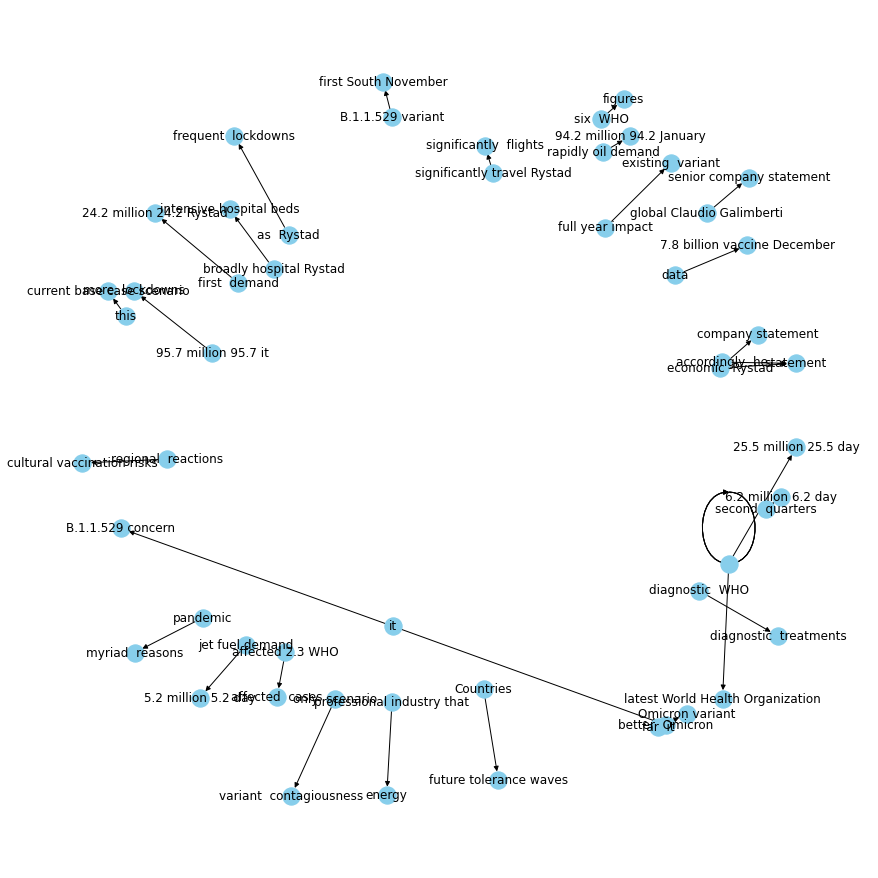

In [29]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

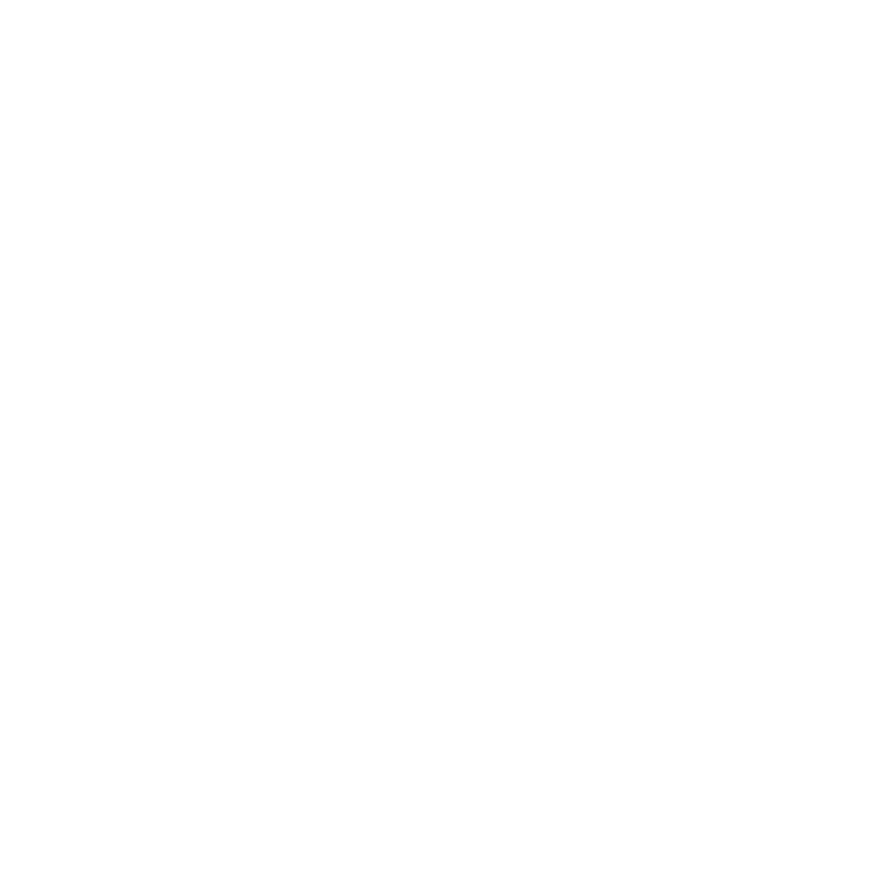

In [30]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

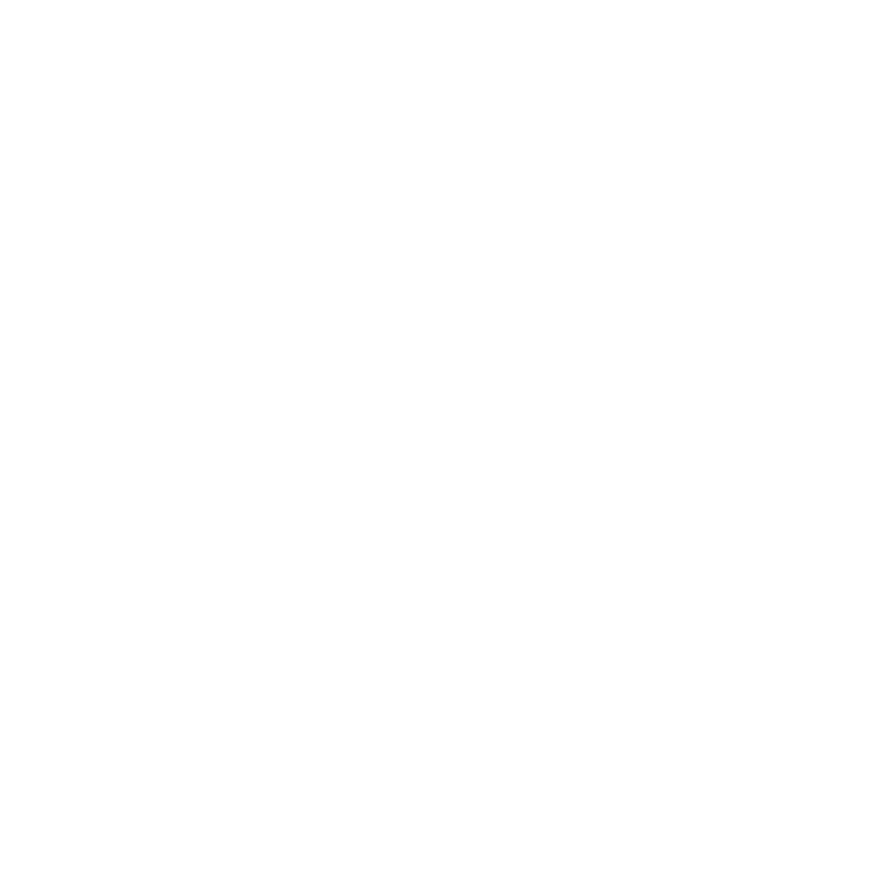

In [31]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()